In [1]:
#importando dados
import pandas as pd
from datetime import datetime

datas = pd.read_fwf(r'C:\Users\patri\OneDrive\Documentos\PI_2\dados.txt', header=None)
datas[0]= datas[0].str.replace('"','')
df_data = datas[0].str.split('[|]', expand = True)
df_data = pd.DataFrame(df_data)


In [2]:
#formatando estrutura de datas
def formatDate(date):
    if (int(date[0:4]) > 1000 and int(date[0:4]) < 2002) and (int(date[4:6]) >= 1 and int(date[4:6]) <= 12) and (int(date[6:]) >= 1 and int(date[6:]) <= 31):
        return f'{date[0:4]}/{date[4:6]}/{date[6:]}'
    else:
        return  f'{date[4:]}/{date[2:4]}/{date[0:2]}'
  


Definindo nome de colunas e contando registros (Região - Sudeste)

In [3]:
#colocando nome coluna
df_data.rename(columns = { 0 : 'CPF' , 1 : 'Região', 2: 'Nasc', 3:'Sexo', 4:'Classe', 5:'Bairro', 6:'CEP', 7:'Cidade', 8:'UF' },inplace=True)
df_data

,CPF,Região,Nasc,Sexo,Classe,Bairro,CEP,Cidade,UF
0,00031077900900,SUDESTE,19460822,M,C,VL DO ESTADIO,16370000,PROMISSAO,SP
1,00002725390600,SUDESTE,19650418,M,C,VL DO ESTADIO,16370000,PROMISSAO,SP
2,00014299631000,SUDESTE,19520501,F,C,PRQ N S DAS DORES,13483110,LIMEIRA,SP
3,00051103184900,SUDESTE,19480310,M,C,PRQ N S DAS DORES,13483110,LIMEIRA,SP
4,00042028000900,SUDESTE,19470804,M,C,JD PONTE ALTA,14820000,AMERICO BRASILIENSE,SP
...,...,...,...,...,...,...,...,...,...
1994,00020302797572,SUL,19601110,F,C,FORTALEZA,89058140,BLUMENAU,SC
1995,00003226459724,SUL,19481126,M,C,VILA ITAQUI,83604210,CAMPO LARGO,PR
1996,00045205680725,SUDESTE,19550207,M,C,JD AMERICA,14811131,ARARAQUARA,SP
1997,00012867616468,SUDESTE,19520308,F,C,VL SAO FRANCISCO,15806155,CATANDUVA,SP


In [4]:
#Formata dados
for i in range(0, len(df_data["Nasc"])):
    dateFormated = formatDate(df_data["Nasc"][i])
    df_data["Nasc"][i] = dateFormated


Uf Qtd de registros
SP    869
RJ    186
MG     64
ES     37
S       3
        2
Name: UF, dtype: int64
Total: SUDESTE    1163
Name: Região, dtype: int64


<AxesSubplot:>

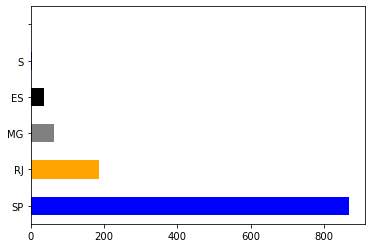

In [5]:
#grafico sudeste/ contabiliza sudeste
df_dataSudeste = df_data.loc[df_data['Região'] == 'SUDESTE']

print('\nUf Qtd de registros')
print(df_dataSudeste['UF'].value_counts())

print(f"Total: {df_dataSudeste['Região'].value_counts()}")


reg = df_dataSudeste['UF'].value_counts()
reg.plot(kind='barh', color = ['blue', 'orange','gray','black'])

In [6]:
#removendo duplicadas
df_dataSudeste.duplicated()
df_dataSudeste.drop_duplicates()

,CPF,Região,Nasc,Sexo,Classe,Bairro,CEP,Cidade,UF
0,00031077900900,SUDESTE,1946/08/22,M,C,VL DO ESTADIO,16370000,PROMISSAO,SP
1,00002725390600,SUDESTE,1965/04/18,M,C,VL DO ESTADIO,16370000,PROMISSAO,SP
2,00014299631000,SUDESTE,1952/05/01,F,C,PRQ N S DAS DORES,13483110,LIMEIRA,SP
3,00051103184900,SUDESTE,1948/03/10,M,C,PRQ N S DAS DORES,13483110,LIMEIRA,SP
4,00042028000900,SUDESTE,1947/08/04,M,C,JD PONTE ALTA,14820000,AMERICO BRASILIENSE,SP
...,...,...,...,...,...,...,...,...,...
1991,00000993425704,SUDESTE,1961/10/28,F,C,CENTRO,15105000,POTIRENDABA,SP
1992,00062588109772,SUDESTE,1970/05/13,M,B,JD NOVA TUIUTY,13295000,ITUPEVA,SP
1993,00080456847472,SUDESTE,1943/03/27,M,A,JD S BENTO,02524000,SAO PAULO,SP
1996,00045205680725,SUDESTE,1955/02/07,M,C,JD AMERICA,14811131,ARARAQUARA,SP


In [8]:
#visualizar apenas registros válidos ( F e M )
df_dataSudeste = df_dataSudeste.query("Sexo != 'I'")
display(df_dataSudeste)

,CPF,Região,Nasc,Sexo,Classe,Bairro,CEP,Cidade,UF
0,00031077900900,SUDESTE,1946/08/22,M,C,VL DO ESTADIO,16370000,PROMISSAO,SP
1,00002725390600,SUDESTE,1965/04/18,M,C,VL DO ESTADIO,16370000,PROMISSAO,SP
2,00014299631000,SUDESTE,1952/05/01,F,C,PRQ N S DAS DORES,13483110,LIMEIRA,SP
3,00051103184900,SUDESTE,1948/03/10,M,C,PRQ N S DAS DORES,13483110,LIMEIRA,SP
4,00042028000900,SUDESTE,1947/08/04,M,C,JD PONTE ALTA,14820000,AMERICO BRASILIENSE,SP
...,...,...,...,...,...,...,...,...,...
1991,00000993425704,SUDESTE,1961/10/28,F,C,CENTRO,15105000,POTIRENDABA,SP
1992,00062588109772,SUDESTE,1970/05/13,M,B,JD NOVA TUIUTY,13295000,ITUPEVA,SP
1993,00080456847472,SUDESTE,1943/03/27,M,A,JD S BENTO,02524000,SAO PAULO,SP
1996,00045205680725,SUDESTE,1955/02/07,M,C,JD AMERICA,14811131,ARARAQUARA,SP


In [9]:
#Diante análise não encontrei nenhuma classe além de A,B e C. Campo validado:
contabiliza2 = df_dataSudeste.Classe.value_counts()
contabiliza2

C    887
B     92
A     53
Name: Classe, dtype: int64

In [10]:
#Mas apliquei o algoritmo para excluir classes que não eram A,B ou C. Caso haja refresh nos dados. 
drp2 = df_dataSudeste[(df_dataSudeste["Classe"] != 'A') 
                      & (df_dataSudeste["Classe"] != 'B')  
                      & (df_dataSudeste["Classe"] != 'C')].index
df_classe= df_dataSudeste.drop(drp2)
print(df_classe.value_counts())

CPF             Região   Nasc        Sexo  Classe  Bairro          CEP       Cidade                 UF
00000022480854  SUDESTE  1939/10/06  F     C       CENTRO          14725000  TAIACU                 SP    1
00044227671515  SUDESTE  1964/11/14  M     C       VL S PEDRO      09784010  SAO BERNARDO DO CAMPO  SP    1
00048120669991  SUDESTE  1972/11/16  M     C       VL EPAMINONDAS  19500000  MARTINOPOLIS           SP    1
00048153982915  SUDESTE  1972/08/04  M     C       CAMPO GRANDE    23033220  RIO DE JANEIRO         RJ    1
00048223417049  SUDESTE  1948/11/01  M     B       A AZUL          07159200  GUARULHOS              SP    1
                                                                                                         ..
00013687638804  SUDESTE  1948/03/18  M     B       ZONA SUL        17780000  LUCELIA                SP    1
00013697013572  SUDESTE  1966/12/24  M     C       CAMPO GRANDE    23036060  RIO DE JANEIRO         RJ    1
00013715731826  SUDESTE  1959/06/

In [11]:
#verificar/dropar quem nasceu antes de 1907
for index in df_classe.index:
    ano = df_classe["Nasc"][index][:4]
    df_classe.loc[index, "ano"] = int(ano)
df_ano = df_classe.query("ano > 1907")
display(df_ano)



,CPF,Região,Nasc,Sexo,Classe,Bairro,CEP,Cidade,UF,ano
0,00031077900900,SUDESTE,1946/08/22,M,C,VL DO ESTADIO,16370000,PROMISSAO,SP,1946.0
1,00002725390600,SUDESTE,1965/04/18,M,C,VL DO ESTADIO,16370000,PROMISSAO,SP,1965.0
2,00014299631000,SUDESTE,1952/05/01,F,C,PRQ N S DAS DORES,13483110,LIMEIRA,SP,1952.0
3,00051103184900,SUDESTE,1948/03/10,M,C,PRQ N S DAS DORES,13483110,LIMEIRA,SP,1948.0
4,00042028000900,SUDESTE,1947/08/04,M,C,JD PONTE ALTA,14820000,AMERICO BRASILIENSE,SP,1947.0
...,...,...,...,...,...,...,...,...,...,...
1991,00000993425704,SUDESTE,1961/10/28,F,C,CENTRO,15105000,POTIRENDABA,SP,1961.0
1992,00062588109772,SUDESTE,1970/05/13,M,B,JD NOVA TUIUTY,13295000,ITUPEVA,SP,1970.0
1993,00080456847472,SUDESTE,1943/03/27,M,A,JD S BENTO,02524000,SAO PAULO,SP,1943.0
1996,00045205680725,SUDESTE,1955/02/07,M,C,JD AMERICA,14811131,ARARAQUARA,SP,1955.0


In [12]:
#retirando a coluna do ano 
df_ano = df_ano.drop(columns=["ano"])
df_ano.head()

,CPF,Região,Nasc,Sexo,Classe,Bairro,CEP,Cidade,UF
0,00031077900900,SUDESTE,1946/08/22,M,C,VL DO ESTADIO,16370000,PROMISSAO,SP
1,00002725390600,SUDESTE,1965/04/18,M,C,VL DO ESTADIO,16370000,PROMISSAO,SP
2,00014299631000,SUDESTE,1952/05/01,F,C,PRQ N S DAS DORES,13483110,LIMEIRA,SP
3,00051103184900,SUDESTE,1948/03/10,M,C,PRQ N S DAS DORES,13483110,LIMEIRA,SP
4,00042028000900,SUDESTE,1947/08/04,M,C,JD PONTE ALTA,14820000,AMERICO BRASILIENSE,SP


In [13]:
#função pra pegar os 11 ultimos digitos para validar digito verificador
def corrigeDigito(cpf):
    novoCPF = cpf[-11:]
    return novoCPF

In [14]:
#aplicando função 11 ultimos digitos
for index in df_classe.index:
    cpf = df_ano["CPF"][index]
    df_ano.loc[index,"CPF"] = corrigeDigito(cpf)
#atribuindo a outra variavel o coluna tratada
df_ano
df_coluna = df_ano["CPF"]
df_coluna

0       31077900900
1       02725390600
2       14299631000
3       51103184900
4       42028000900
           ...     
1991    00993425704
1992    62588109772
1993    80456847472
1996    45205680725
1997    12867616468
Name: CPF, Length: 1032, dtype: object

In [15]:
#função do digito verificador
def calculaDigito(CPF1):
    #dv1
    if (CPF1[9]) == '0' and (CPF1[10]) == '0' :
        CPF1 = (CPF1[:9])
    else:
        CPF1 = (CPF1[:9])
    resultado = 0
    for i in range(10,1,-1):
        resultado += int(CPF1[-(i-1)])*i
    dv1=11-(resultado%11)
    if dv1 >= 10:
        dv1 = 0
    #dv2
    CPF2 = str(CPF1) + str(dv1)
    CPF2
    resultado = 0
    for i in range(10,1,-1):
        resultado += int( CPF2[-(i-1)] ) *i
    resultado 
    dv2 = 11-resultado%11
    if dv2 >= 10:
        dv2 = 0
    #junta tudo 
    CPF3 = str(CPF1) + str(dv1) + str(dv2)
    return CPF3

In [16]:
#testando o calculaDigito
for index in df_classe.index:
    cpf = df_ano["CPF"][index]
    df_ano.loc[index,"CPF"] = calculaDigito(cpf)

In [18]:
#exportando o csv tratado
df_ano.to_csv('C:/Users/patri/OneDrive/Documentos/PI_2/tratado.csv')